<a href="https://colab.research.google.com/github/sanjay-thiyagarajan/projects/blob/master/fashion_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf #Google's Machine Learning Framework
from tensorflow import keras #Deep Learning Library under TensorFlow
from keras import Sequential #Sequential stack form for modelling
from keras.layers import Dense #Dense layers for implementing Hidden Layers in the Neural Network
import numpy as np #Library for numerical conversions and calculations
import matplotlib.pyplot as plt # Library for data visualization
from sklearn import metrics #Evaluation metrics for the model


In [ ]:
fashion_mnists = keras.datasets.fashion_mnist #MNIST Fashion Dataset is downloaded and then saved to the dataframe fashion_mnists
(train_imgs,train_labels),(test_imgs,test_labels) = fashion_mnists.load_data() #The dataframe is segmented into appropriate training and test sets.


4423680/4422102 [==============================] - 0s 0us/step


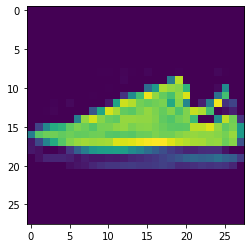

In [ ]:
plt.imshow(train_imgs[6])

In [ ]:
train_imgs = train_imgs / 255.0 #Pixel Resizing for training set
test_imgs = test_imgs / 255.0 #Pixel Resizing for test set
train_imgs = train_imgs.reshape(60000,28,28,1) #Training data is reshaped into 28x28 dimension and flatttened
test_imgs = test_imgs.reshape(10000,28,28,1) #Test data is reshaped into 28x28 dimension and flattened

In [ ]:
model = Sequential([ #model is attached to a Sequential stack
                    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)), #64 convolutional filters are applied at the first stage
                    keras.layers.MaxPool2D(2,2), #The image is then filtered to half the existing dimension 
                    keras.layers.Conv2D(64,(3,3),activation='relu'), #image is then again passed through 64 convolutional filters but with filtered features
                    keras.layers.MaxPool2D(2,2),#The image is again filtered to half the existing dimensions
                    keras.layers.Flatten(), #The feature is then flattened to push through the hidden layers
                    Dense(512, activation=tf.nn.relu), #Hidden layer with 512 neurons
                    Dense(10, activation=tf.nn.softmax) #Hidden layer with 10 neurons for classification purpose
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #Uses Adam optimizer and Sparse categorical Cross entropy
model.fit(train_imgs,train_labels, epochs=5) #5 epoch training is initiated

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0981
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0979
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0997


In [ ]:
model.save('/content/drive/My Drive/models/trained_model.h5') #Trained model is then saved 

In [ ]:
model.evaluate(test_imgs,test_labels) #Model is evaluated with Loss and Accuracy as parameters
pred =  model.predict(test_imgs)


313/313 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1000
